In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
import cv2 as cv

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 30})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Import local functions
import extra_func as efunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Effect of planet optical thickness and albedo

<IPython.core.display.Javascript object>


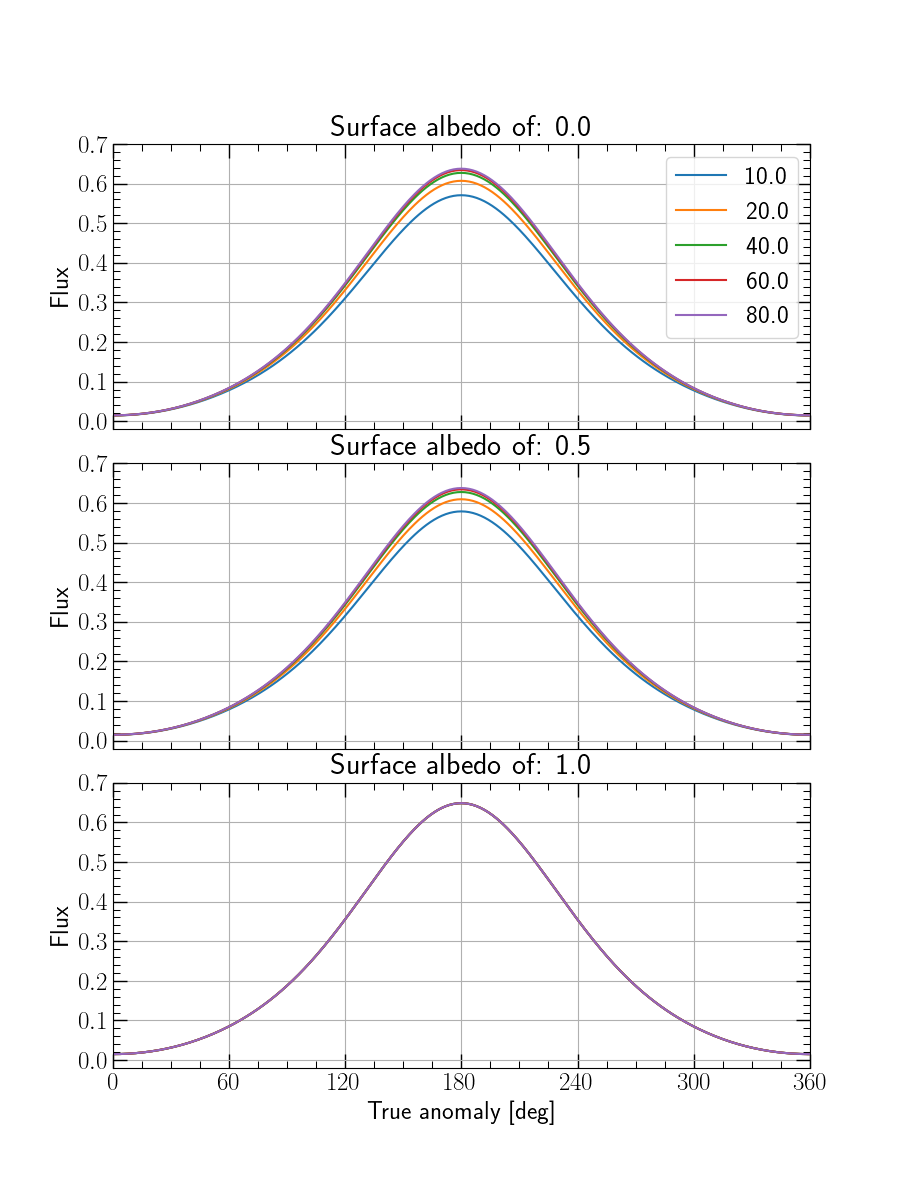

In [17]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

save_file = None
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Sp = np.array(save_file["Sp"])
        Pp = np.array(save_file["Pp"])
        flux = Sp[:,0]

        axs[ii].plot(true_anomaly,flux,label=f"{p_o}")
        axs[ii].set_ylabel("Flux")
        if ii == 0:
            axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        efunc.setup(axs[ii],60,0,360,0.1,-0.02,0.7,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
fig.savefig("/home/allard/Results/Planet_atmosphere_flux.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

<IPython.core.display.Javascript object>


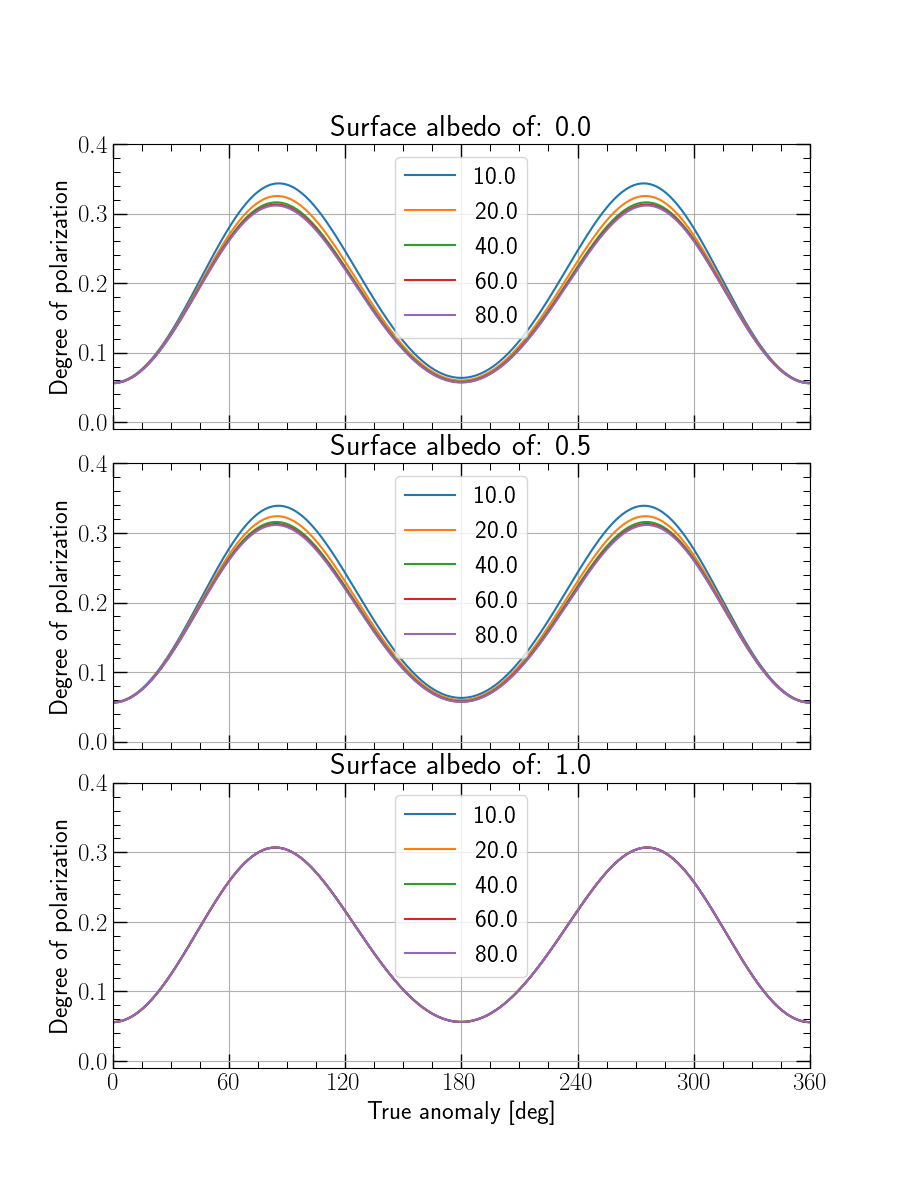

In [12]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

save_file = None
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Pp = np.array(save_file["Pp"])

        axs[ii].plot(true_anomaly,abs(Pp),label=f"{p_o}")
        axs[ii].set_ylabel("Degree of polarization")
        axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        efunc.setup(axs[ii],60,0,360,0.1,-0.01,0.4,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
fig.savefig("/home/allard/Results/Planet_atmosphere_degree.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

<IPython.core.display.Javascript object>


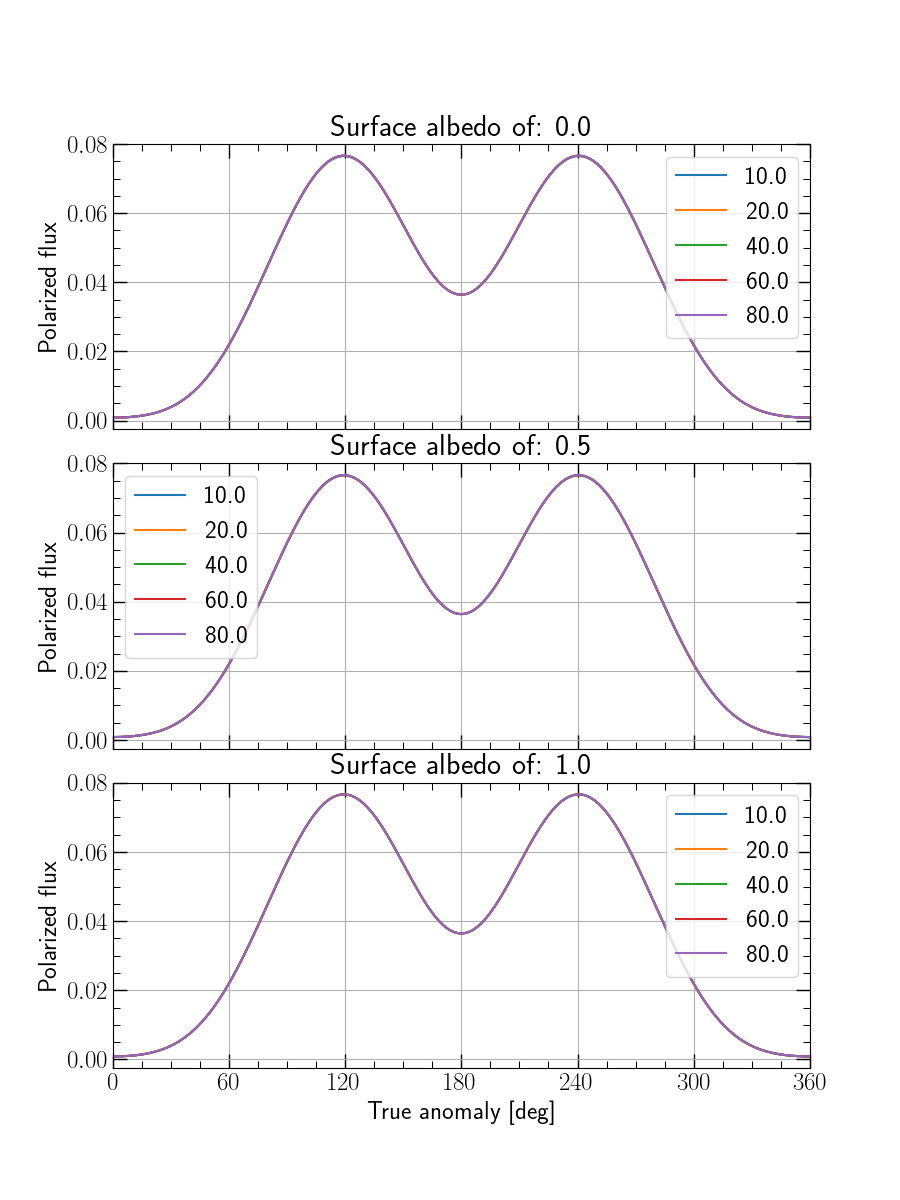

In [13]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}
"""
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

save_file = None
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)
# fig.suptitle("Flux curves for different optical thicknessess and surface albedo", y=0.93,fontsize=25)

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
        data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
        data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

        with open(data_name,"rb") as f:
            save_file = pickle.load(f)
            
        true_anomaly = np.array(save_file["lambda"])
        alpha = np.array(save_file["alpha"])
        Sp = np.array(save_file["Sp"])
        Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)

        axs[ii].plot(true_anomaly,Pflux,label=f"{p_o}")
        axs[ii].set_ylabel("Polarized flux")
        axs[ii].legend()
        axs[ii].grid()
        axs[ii].set_title(f"Surface albedo of: {s_a}")
        if ii == 2:
            notext = True
        efunc.setup(axs[ii],60,0,360,0.02,-0.0025,0.08,notext=notext)

axs[2].set_xlabel("True anomaly [deg]")
fig.savefig("/home/allard/Results/Planet_atmosphere_Pflux.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

<IPython.core.display.Javascript object>


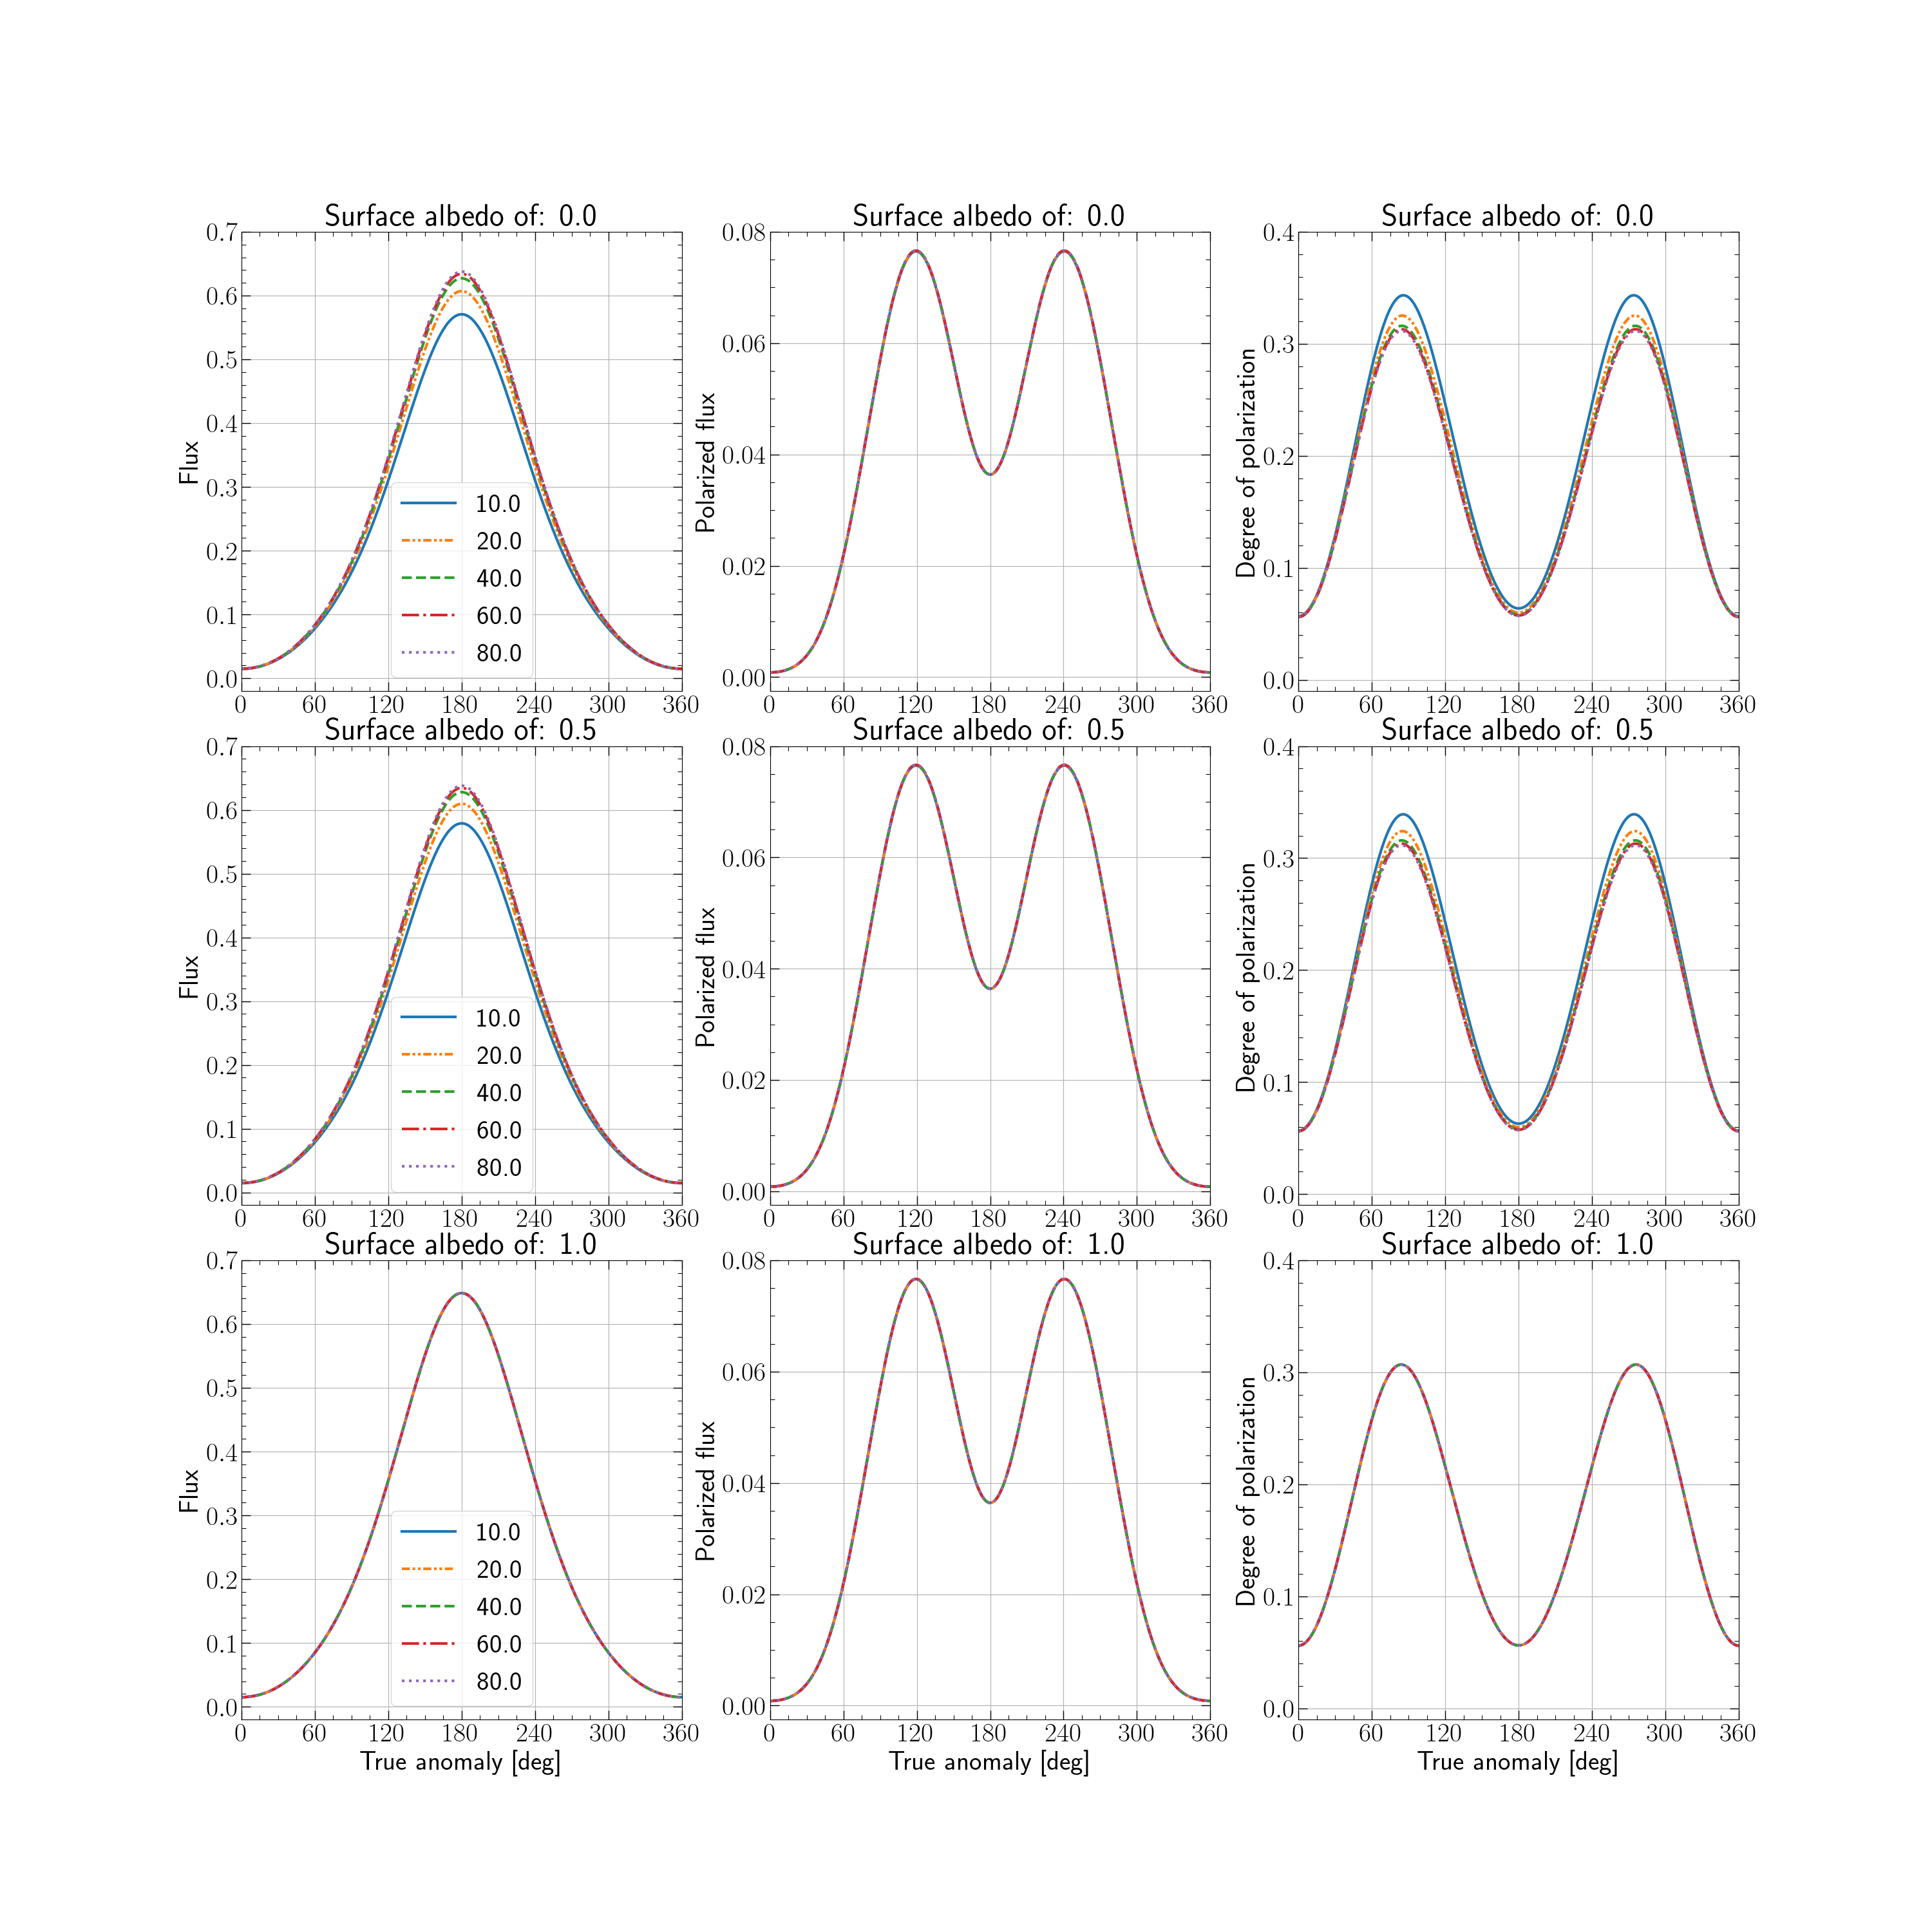

In [7]:
planet_o_thickness = np.array(["10.0","20.0","40.0","60.0","80.0"])
planet_s_albedo = np.array(["0.0","0.5","1.0"])

notext = True
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(ncols=3, nrows=3, hspace=0.12)
axs = gs.subplots(sharex=True)

plot_line = ["-",(0, (3, 1, 1, 1, 1, 1)),"--","-.",":"]

for ii, s_a in enumerate(planet_s_albedo):
    for jj, p_o in enumerate(planet_o_thickness):
            data_loc = f"/home/allard/Data/bmsca_{p_o}_asurf_Series/bmsca_{p_o}_asurf_{s_a}/"
            data_name = data_loc + f"data_with_bmsca_{p_o}_asurf_{s_a}.pkl"

            with open(data_name,"rb") as f:
                save_file = pickle.load(f)
                
            true_anomaly = np.array(save_file["lambda"])
            alpha = np.array(save_file["alpha"])
            Stot = np.array(save_file["Sp"])
            Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
            Ptot = np.array(save_file["Pp"])
            flux = Stot[:,0]
            
            axs[ii,0].plot(true_anomaly,flux,linestyle=plot_line[jj],label=f"{p_o}",linewidth=3)
            axs[ii,1].plot(true_anomaly,Pflux,linestyle=plot_line[jj],label=f"{p_o}",linewidth=3)
            axs[ii,2].plot(true_anomaly,abs(Ptot),linestyle=plot_line[jj],label=f"{p_o}",linewidth=3)
            axs[ii,0].legend(fontsize=30)
            
            efunc.setup(axs[ii,0],60,0,360,0.1,-0.02,0.7,notext=notext)
            efunc.setup(axs[ii,1],60,0,360,0.02,-0.0025,0.08,notext=notext)
            efunc.setup(axs[ii,2],60,0,360,0.1,-0.01,0.4,notext=notext)
            
            axs[ii,0].set_title(f"Surface albedo of: {s_a}",fontsize=35)
            axs[ii,1].set_title(f"Surface albedo of: {s_a}",fontsize=35)
            axs[ii,2].set_title(f"Surface albedo of: {s_a}",fontsize=35)
            
            axs[ii,0].set_ylabel("Flux",fontsize=30)
            axs[ii,1].set_ylabel("Polarized flux",fontsize=30)
            axs[ii,2].set_ylabel("Degree of polarization",fontsize=30)
            if ii == 2:
                axs[2,0].set_xlabel("True anomaly [deg]",fontsize=30)
                axs[2,1].set_xlabel("True anomaly [deg]",fontsize=30)
                axs[2,2].set_xlabel("True anomaly [deg]",fontsize=30)

for ii in range(len(planet_s_albedo)):
    axs[ii,0].grid()
    axs[ii,1].grid()
    axs[ii,2].grid()

fig.savefig("/home/allard/Results/Planet_atmosphere_all.svg", bbox_inches='tight', format='svg', dpi=1200)
#.eps", format='eps', bbox_inches='tight')
plt.show()

## Effect of orbital inclination, no ring

<IPython.core.display.Javascript object>


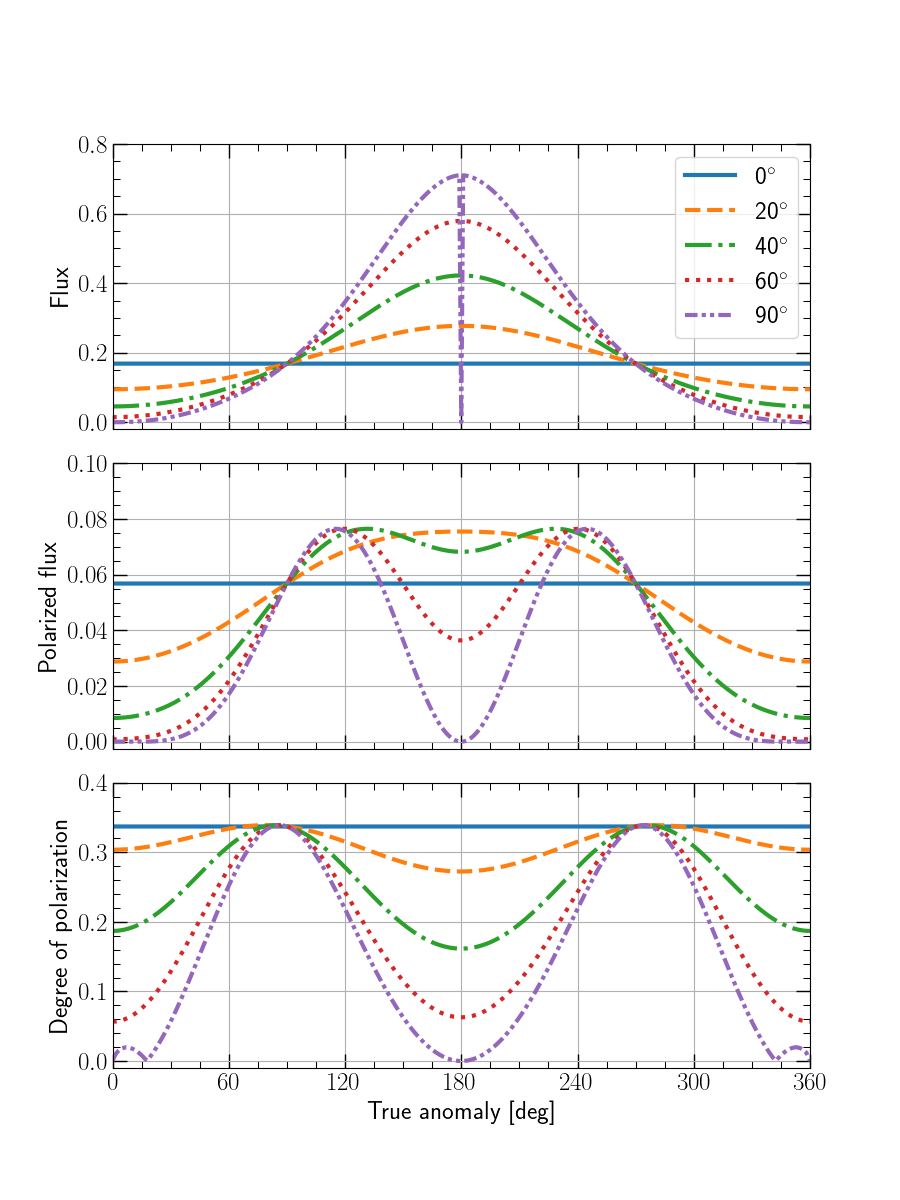

In [5]:
"""
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr,
             "Param": parameters}
"""
orbit_i_arr = np.array([0,20,40,60,90])

name = "Orbit_incl80_fix"#80_fix

notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)

# fig2 = plt.figure()
# ax2=fig2.gca()

plot_line = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]

for ii, orbit_i in enumerate(orbit_i_arr):
    data_loc = f"/home/allard/Data/{name}_Series/{name}_{orbit_i}/"
    data_name = data_loc + f"data_with_{name}_{orbit_i}.pkl"

    with open(data_name,"rb") as f:
        save_file = pickle.load(f)

    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Sp = np.array(save_file["Sp"])
    Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)
    Pp = np.array(save_file["Pp"])
    flux = Sp[:,0]
    
    if orbit_i == 90:
        Rip = np.array(save_file["Rip"])
        tp = np.array(save_file["tp"])
        ip = np.array(save_file["ip"])
        vp = np.array(save_file["vp"])
#         npl = np.array(save_file["np"])
#         ap = np.array(save_file["ap"])
#         apsr = np.array(save_file["apsr"])
#         apso = np.array(save_file["apso"])
#         apsb = np.array(save_file["apsb"])
#         print("Index, max apsb: ", np.argmax(np.sum(apsb[1:-1,:],axis=1)))
#         print("Max index apsb: ", apsb[179,:].sum())
#         print("Transit cond: ",tp[0,:].sum())
#         print("Illumination cond: ",ip[0,:].sum())
#         print("Visible cond: ",vp[0,:].sum())
#         print("Indirect cond: ",npl[0,:].sum())
#         print("Active ap: ", ap[0,:].sum())
#         print("Active apsr: ", apsr[0,:].sum())
#         print("Active apso: ", apso[0,:].sum())
#         print("Active apsb: ", apsb[0,:].sum())
#         print("Active apso*ip: ", ((apso[0,:])*(ip[0,:])).sum())
# #         print("Active apsb*~tp: ", ((apsb[0,:])*(~tp[0,:])).sum())
#         mask0 = Rip[0,:] > 1e-10
#         mask1 = Rip[1,:] > 1e-10
#         print("Active spangles at 0: ", mask0.sum())
#         print("Active spangles at 1: ",mask1.sum())
#         print(flux[0], flux[-1])
        
    axs[0].plot(true_anomaly,flux,linestyle=plot_line[ii],label=f"{orbit_i}$^\circ$",linewidth=3)
    axs[1].plot(true_anomaly,Pflux,linestyle=plot_line[ii],label=f"Inclination {orbit_i}",linewidth=3)
    axs[2].plot(true_anomaly,abs(Pp),linestyle=plot_line[ii],label=f"Inclination {orbit_i}",linewidth=3)
    if ii == 8:
        notext = True
#     ax2.plot(true_anomaly,Sp[:,1],label="Q")
#     ax2.plot(true_anomaly,Sp[:,2],label="U")
    
axs[0].legend()
axs[0].grid()
# axs[1].legend()
axs[1].grid()
# axs[2].legend()
axs[2].grid()
    
efunc.setup(axs[0],60,0,360,0.2,-0.02,0.8,notext=notext)
efunc.setup(axs[1],60,0,360,0.02,-0.0025,0.1,notext=notext)
efunc.setup(axs[2],60,0,360,0.1,-0.01,0.4,notext=notext)
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Polarized flux")
axs[2].set_ylabel("Degree of polarization")
axs[2].set_xlabel("True anomaly [deg]")

fig.savefig("/home/allard/Results/Orbit_incl.svg", bbox_inches='tight', format='svg', dpi=1200)#, format='eps', bbox_inches='tight')
plt.show()

#### Face-on ring:
Transit cond:  6000   
Illumination cond:  6000  
Visible cond:  6000   
Active spangles at 0:  0   
Active spangles at 1:  33   
0.0 0.0

#### Old 80:
Transit cond:  6002         
Illumination cond:  5859      
Visible cond:  5863   
Indirect cond:  2528         
Active spangles at 0:  139      
Active spangles at 1:  35   
0.016689645274256534 0.016689645274256534   

#### New 80:
Transit cond:  6002   
Illumination cond:  5859   
Visible cond:  5863   
Indirect cond:  2528   
Active spangles at 0:  139   
Active spangles at 1:  35   
0.016689645274256534 0.016689645274256534   

#### More 80:
Transit cond:  6002   
Illumination cond:  5859   
Visible cond:  5863   
Indirect cond:  2528   
Active ap:  5863   
Active apsr:  5863   
Active apso:  139   
Active apsb:  139   
Active spangles at 0:  139   
Active spangles at 1:  35   
0.016689645274256534 0.016689645274256534   

#### Fix 80:
Transit cond:  6002   
Illumination cond:  5859   
Visible cond:  5863   
Indirect cond:  2528   
Active ap:  5863   
Active apsr:  5863      
Active apso:  139      
Active apsb:  139   
Active spangles at 0:  0   
Active spangles at 1:  35   
0.0 0.0

In [53]:
efunc.crossCalc(30,60,20)

array([ 69.41656654, 249.41656718])

## Geometry sweep

<IPython.core.display.Javascript object>


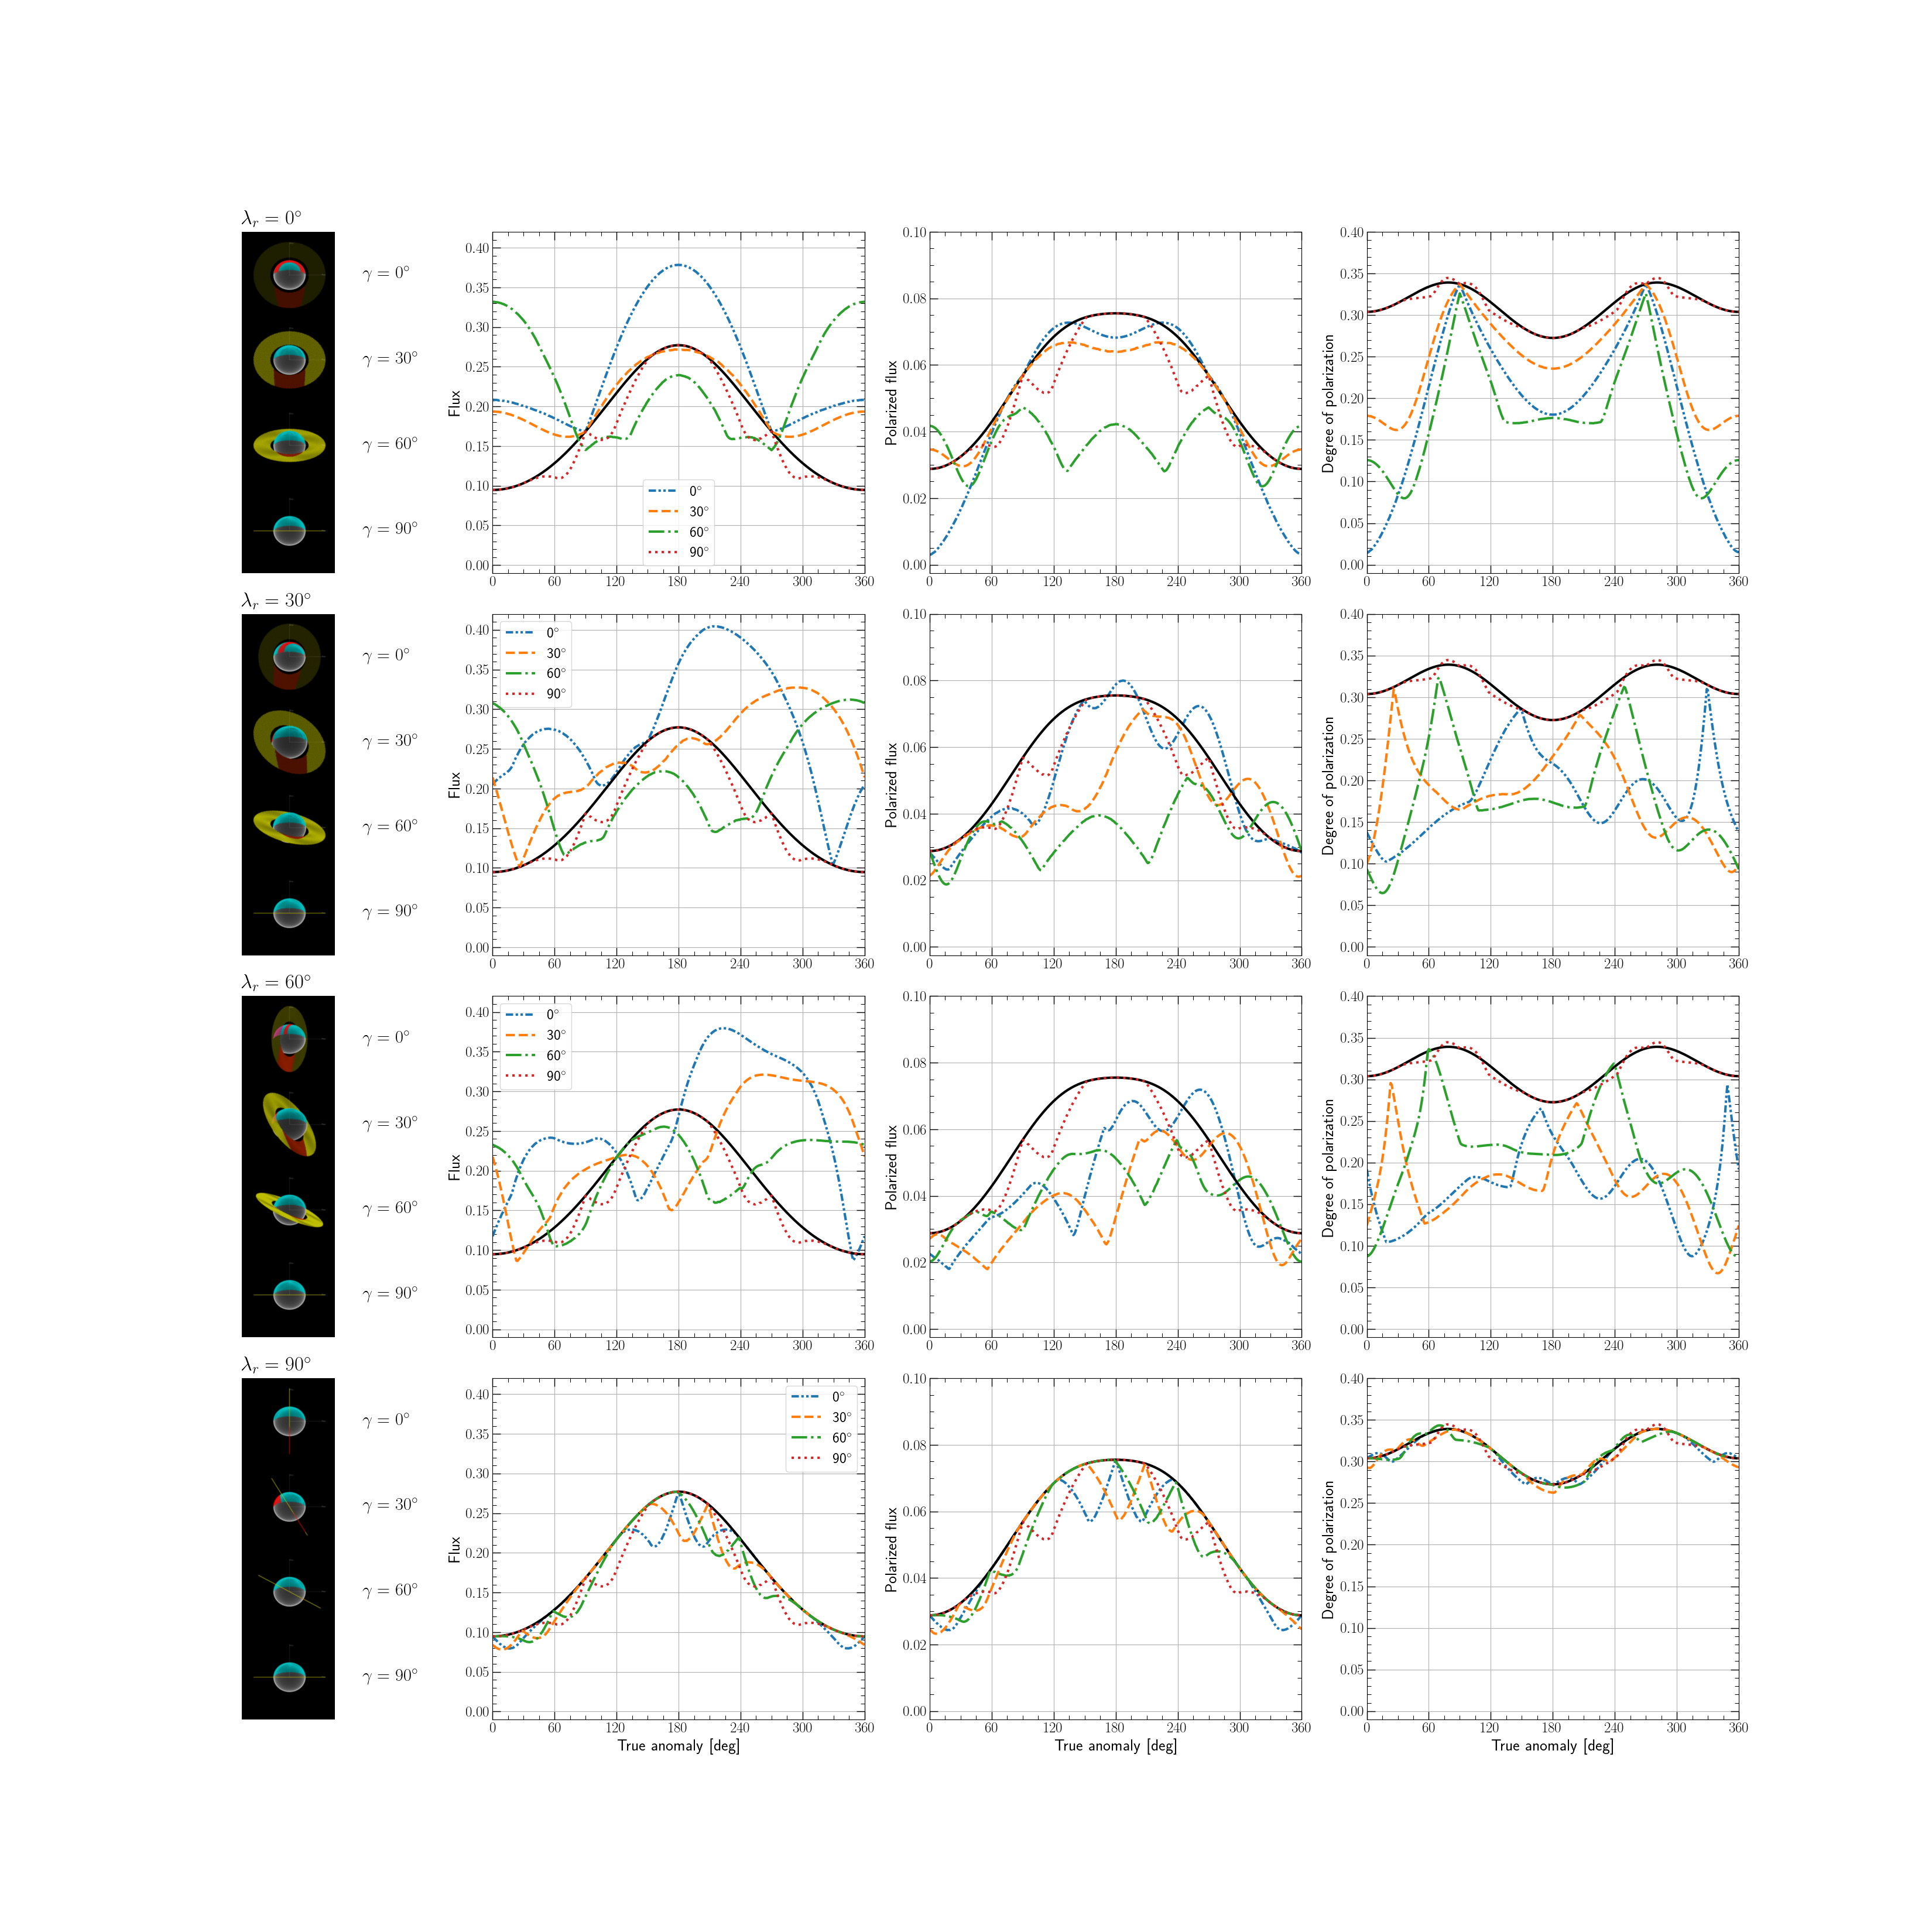

Orbit inclination: 20, Ring inclination: 0, Ring longitude: 0 
Max value flux = 0.37834927332028107
Orbit inclination: 20, Ring inclination: 30, Ring longitude: 0 
Max value flux = 0.27174983883970194
Orbit inclination: 20, Ring inclination: 60, Ring longitude: 0 
Max value flux = 0.33186643615882216
Orbit inclination: 20, Ring inclination: 90, Ring longitude: 0 
Max value flux = 0.2771413107573177
Orbit inclination: 20, Ring inclination: 0, Ring longitude: 30 
Max value flux = 0.40441400263441163
Orbit inclination: 20, Ring inclination: 30, Ring longitude: 30 
Max value flux = 0.32745477132164
Orbit inclination: 20, Ring inclination: 60, Ring longitude: 30 
Max value flux = 0.31212068482393335
Orbit inclination: 20, Ring inclination: 90, Ring longitude: 30 
Max value flux = 0.2771432820697561
Orbit inclination: 20, Ring inclination: 0, Ring longitude: 60 
Max value flux = 0.37953145327452287
Orbit inclination: 20, Ring inclination: 30, Ring longitude: 60 
Max value flux = 0.3210784142

In [42]:
ring_i_arr = np.array([0,30,60,90]) # 90 is edge-on, 0 is face-on
ring_l_arr = np.array([0,30,60,90])
orbit_i_arr = np.array([20])#,90]) # 20 or 90

notext = True
fig = plt.figure(figsize=(33,33))
gs = fig.add_gridspec(ncols=4, nrows=4, hspace=0.12,width_ratios= [0.5,1,1,1])
axs = gs.subplots(sharex=True)

plot_line = [(0, (3, 1, 1, 1, 1, 1)),"--","-.",":"]
sub_plot_loc = [0.75,0.5,0.25,0.0]

for ii,orbit_i in enumerate(orbit_i_arr):
    for jj,ring_l in enumerate(ring_l_arr):
        for kk,ring_i in enumerate(ring_i_arr):
            save_location = f"/home/allard/Data/Geom_series/Orbit_i_{orbit_i}/Ring_L_{ring_l}/Ring_i_{ring_i}/"
            data_name = save_location + f"data_with_oi_{orbit_i}_rl_{ring_l}_ri_{ring_i}.pkl"
            figure_loc = save_location + f"fig_with_oi_{orbit_i}_rl_{ring_l}_ri_{ring_i}_obs.png"
            
            with open(data_name,"rb") as f:
                save_file = pickle.load(f)
                
            true_anomaly = np.array(save_file["lambda"])
            alpha = np.array(save_file["alpha"])
            Stot = np.array(save_file["Stot"])
            Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
            Ptot = np.array(save_file["Ptot"])
            flux = Stot[:,0]
            
            subpos = [0.0,sub_plot_loc[kk],0.5,0.25]
            subax1 = efunc.add_subplot_axes(axs[jj,0],subpos)
            figure = cv.imread(figure_loc, cv.IMREAD_UNCHANGED)#cv.IMREAD_GRAYSCALE)#cv.IMREAD_UNCHANGED)
            scale_percent = 80
            width = int(figure.shape[1] * scale_percent / 100)
            height = int(figure.shape[0] * scale_percent / 100)
            dim = (width,height)
            resized = cv.resize(figure, dim, interpolation = cv.INTER_AREA)
            subax1.imshow(resized, interpolation='bicubic', aspect='auto')
            if kk==0:
                subax1.text(0.0, 1.15, f'$\lambda_r = {ring_l}^\circ$',
                            {'fontsize': 25}, horizontalalignment='left',
                            verticalalignment='center', transform=subax1.transAxes)
            subax1.text(1.3, 0.5, f'$\gamma = {ring_i}^\circ$', {'fontsize': 22},
                        horizontalalignment='left', verticalalignment='center', 
                        transform=subax1.transAxes)
            subax1.set_axis_off()
            axs[jj,0].set_axis_off()
            
            axs[jj,1].plot(true_anomaly,flux,linestyle=plot_line[kk],label=f"{ring_i}$^\circ$",linewidth=3)
            axs[jj,2].plot(true_anomaly,Pflux,linestyle=plot_line[kk],label=f"Inclination {ring_i}",linewidth=3)
            axs[jj,3].plot(true_anomaly,abs(Ptot),linestyle=plot_line[kk],label=f"Inclination {ring_i}",linewidth=3)
            axs[jj,1].legend()
            
            print(f"Orbit inclination: {orbit_i}, Ring inclination: {ring_i}, Ring longitude: {ring_l} \n" +\
                  f"Max value flux = {np.max(flux)}")
            
            ### Result of just planet ###
            if kk == 0:
                data_loc = f"/home/allard/Data/Orbit_incl80_fix_Series/Orbit_incl80_fix_{orbit_i}/"
                data_name = data_loc + f"data_with_Orbit_incl80_fix_{orbit_i}.pkl"

                with open(data_name,"rb") as f:
                    save_file = pickle.load(f)
                true_anomaly = np.array(save_file["lambda"])
                alpha = np.array(save_file["alpha"])
                Sp = np.array(save_file["Sp"])
                Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)
                Pp = np.array(save_file["Pp"])
                flux = Sp[:,0]
                axs[jj,1].plot(true_anomaly,flux,linestyle="-",color="k",linewidth=3)
                axs[jj,2].plot(true_anomaly,Pflux,linestyle="-",color="k",linewidth=3)
                axs[jj,3].plot(true_anomaly,abs(Pp),linestyle="-",color="k",linewidth=3)

            # For 90 deg
#             efunc.setup(axs[jj,1],60,0,360,0.2,-0.025,1.02,notext=notext)
#             efunc.setup(axs[jj,2],60,0,360,0.02,-0.0025,0.1,notext=notext)
#             efunc.setup(axs[jj,3],60,0,360,0.05,-0.01,0.4,notext=notext)

            # For 20 deg
            efunc.setup(axs[jj,1],60,0,360,0.05,-0.01,0.42,notext=notext)
            efunc.setup(axs[jj,2],60,0,360,0.02,-0.0025,0.1,notext=notext)
            efunc.setup(axs[jj,3],60,0,360,0.05,-0.01,0.4,notext=notext)
            
            axs[jj,1].set_ylabel("Flux",fontsize=20)
            axs[jj,2].set_ylabel("Polarized flux",fontsize=20)
            axs[jj,3].set_ylabel("Degree of polarization",fontsize=20)
            if jj ==3:
                axs[3,1].set_xlabel("True anomaly [deg]",fontsize=20)
                axs[3,2].set_xlabel("True anomaly [deg]",fontsize=20)
                axs[3,3].set_xlabel("True anomaly [deg]",fontsize=20)

for jj in range(len(ring_l_arr)):
    axs[jj,1].grid()
    axs[jj,2].grid()
    axs[jj,3].grid()

fig.savefig("/home/allard/Results/Geom_orbit_i_20_low.svg", bbox_inches='tight', format='svg', dpi=100)
#.eps", format='eps', bbox_inches='tight')
plt.show()

Orbit inclination: 90, Ring inclination: 0, Ring longitude: 0 
Max value flux = 7.89493699574874
Orbit inclination: 90, Ring inclination: 30, Ring longitude: 0 
Max value flux = 6.9188603031322815
Orbit inclination: 90, Ring inclination: 60, Ring longitude: 0 
Max value flux = 2.6678830809407463
Orbit inclination: 90, Ring inclination: 90, Ring longitude: 0 
Max value flux = 0.7100252791442203
Orbit inclination: 90, Ring inclination: 0, Ring longitude: 30 
Max value flux = 6.90858927016657
Orbit inclination: 90, Ring inclination: 30, Ring longitude: 30 
Max value flux = 5.820496108243549
Orbit inclination: 90, Ring inclination: 60, Ring longitude: 30 
Max value flux = 1.8511971433072305
Orbit inclination: 90, Ring inclination: 90, Ring longitude: 30 
Max value flux = 0.7100247558237399
Orbit inclination: 90, Ring inclination: 0, Ring longitude: 60 
Max value flux = 2.822482996640156
Orbit inclination: 90, Ring inclination: 30, Ring longitude: 60 
Max value flux = 1.9736144831174636
Orbit inclination: 90, Ring inclination: 60, Ring longitude: 60 
Max value flux = 0.6375664427108645
Orbit inclination: 90, Ring inclination: 90, Ring longitude: 60 
Max value flux = 0.7100249630996791
Orbit inclination: 90, Ring inclination: 0, Ring longitude: 90 
Max value flux = 0.7003338326569718
Orbit inclination: 90, Ring inclination: 30, Ring longitude: 90 
Max value flux = 0.7015307658820761
Orbit inclination: 90, Ring inclination: 60, Ring longitude: 90 
Max value flux = 0.7050295892055418
Orbit inclination: 90, Ring inclination: 90, Ring longitude: 90 
Max value flux = 0.7100252793884879

## Optical thickness vs illumination angle

<IPython.core.display.Javascript object>


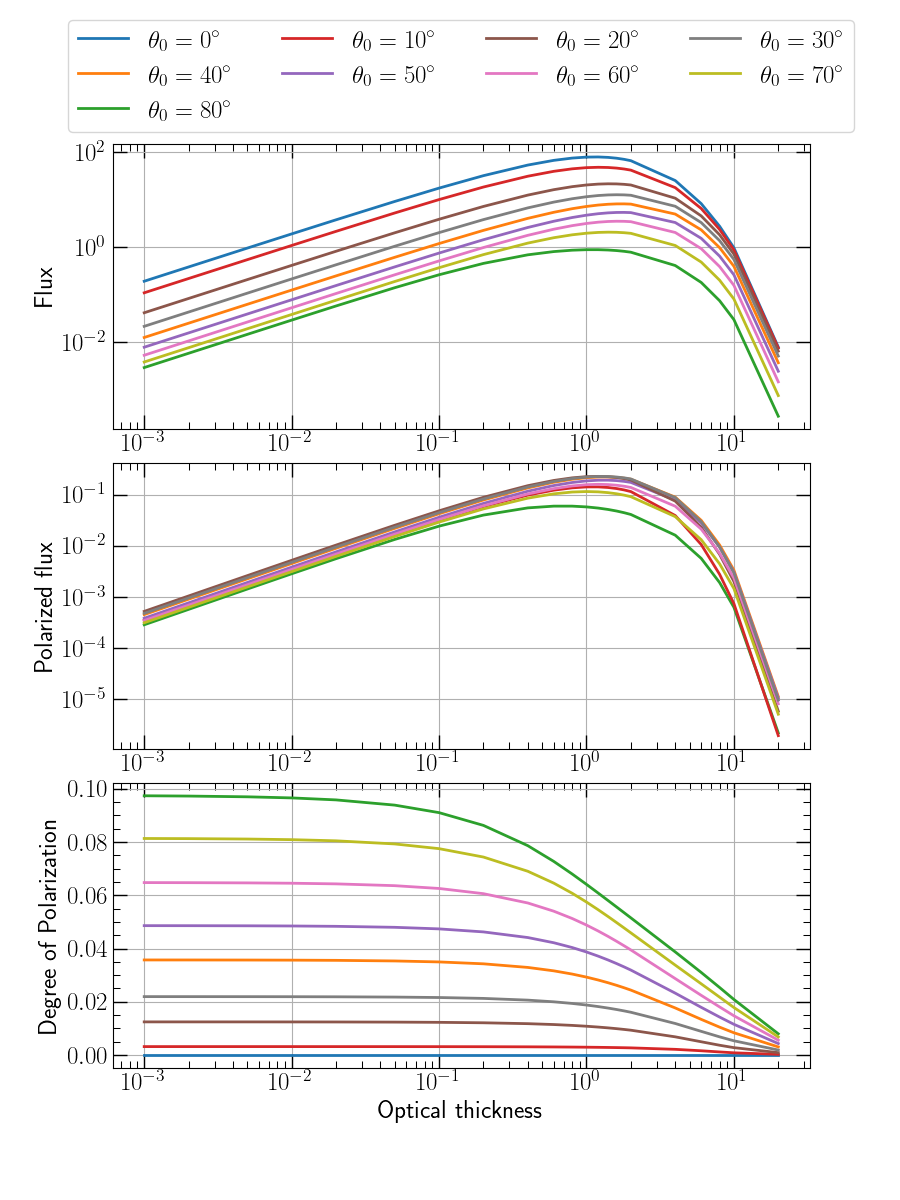

In [21]:
num_array = np.array(["0_001","0_002","0_005","0_01","0_02","0_05","0_1","0_2","0_4","0_6","0_8",
                      "1_0","1_2","1_4","1_6","1_8","2_0","4_0","6_0","8_0","10_0","20_0"])

ring_i = 0 # 90 is edge-on, 0 is face-on
ring_l = 0
orbit_i_arr = np.linspace(10,90,9)# 90 is edge-on, 0 is face-on

flux = np.zeros((len(num_array),len(orbit_i_arr)))
Q = np.zeros((len(num_array),len(orbit_i_arr)))
U = np.zeros((len(num_array),len(orbit_i_arr)))
degree = np.zeros((len(num_array),len(orbit_i_arr)))
pflux = np.zeros((len(num_array),len(orbit_i_arr)))
chi_angle = np.zeros((len(num_array),len(orbit_i_arr)))
check = np.zeros((len(num_array),len(orbit_i_arr)))

for i,fou_file_num in enumerate(num_array):
    with open(f"/home/allard/Data/Optical_thickness/opt_thickness_{fou_file_num}.pkl","rb") as f:
        save_file = pickle.load(f)
    stokes = save_file["Flux"]
    flux[i,:] = stokes[:,0]
    Q[i,:] = stokes[:,1]
    U[i,:] = stokes[:,2]
    degree[i,:] = save_file["Degree"]
    pflux[i,:] = np.sqrt(stokes[:,1]**2 + stokes[:,2]**2)
    illum_angle = save_file["Illum"]
    view_angle = save_file["View"]
    chi_angle[i,:] = np.arctan2(stokes[:,2],stokes[:,1])/2 + np.pi
    check[i,:] = np.cos(2*chi_angle[i,:])*stokes[:,1] >= 0

chi_angle *=180/np.pi
chi_angle = chi_angle%180
illum_angle = np.arccos(abs(illum_angle))*180/np.pi
view_angle = np.arccos(abs(view_angle))*180/np.pi
x = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6,0.8,
              1.0,1.2,1.4,1.6,1.8,2.0,4.0,6.0,8.0,10.0,20.0])

correct_order = np.array([8, 4, 0, 7, 3, 6, 2, 5, 1])

fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=False)

for jj in correct_order:
    axs[0].plot(x,flux[:,jj],label=f"$\\theta_0 = {int(round(illum_angle[jj],1))}^\circ$",linewidth=2)
    axs[1].plot(x,pflux[:,jj],linewidth=2)
    axs[2].plot(x,abs(degree[:,jj]),linewidth=2)

axs[0].set_xscale("log")
axs[0].set_yscale("log")
# axs[0].set_xlabel("Optical thickness")
axs[0].set_ylabel("Flux")
# axs[0].legend()
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.48),
              ncol=4)
axs[0].grid()
axs[0].yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=5))
axs[0].yaxis.set_minor_locator(ticker.LogLocator(10.0,subs='auto'))
axs[0].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
axs[0].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylabel("Polarized flux")
axs[1].grid()
axs[1].yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=6))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
axs[1].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

axs[2].set_xscale("log")
axs[2].set_xlabel("Optical thickness")
# axs[1].set_yscale("log")
# axs[0].set_xlabel("Optical thickness")
axs[2].set_ylabel("Degree of Polarization")
axs[2].grid()
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
axs[2].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

# plt.savefig('/home/allard/Results/opticalthickness_vs_flux_reflection.eps', format='eps', bbox_inches='tight')
# plt.savefig('/home/allard/Results/opticalthickness_vs_flux_reflection.png', dpi=300, bbox_inches='tight')
plt.savefig("/home/allard/Results/opticalthickness_vs_flux.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

# correct_order = np.array([8, 3, 7, 2, 6, 1, 5, 0, 4])

# fig = plt.figure(figsize=(14,7))
# gs = fig.add_gridspec(1,2, wspace=0.25)
# ax = gs.subplots(sharex=False)
# for jj in correct_order:
#     ax[0].plot(x,chi_angle[:,jj],label=f"$\\theta_0 = {int(round(illum_angle[jj],1))}^\circ$",linewidth=2)
#     ax[1].plot(x,Q[:,jj],label=f"$\\theta_0 = {int(round(illum_angle[jj],1))}^\circ$",linewidth=2)
# ax[0].set_xscale("log")
# ax[0].set_ylabel("$\\chi$")
# ax[0].set_xlabel("Optical thickness")
# # ax.legend()
# ax[0].legend(loc='upper center', bbox_to_anchor=(1.15, 1.17),
#           ncol=5)
# ax[0].grid()
# ax[0].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
# ax[0].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

# ax[1].set_xscale("log")
# ax[1].set_ylabel("$Q$")
# ax[1].set_xlabel("Optical thickness")
# ax[1].grid()
# ax[1].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
# ax[1].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

# plt.show()

## Optical thickness Sweep

<IPython.core.display.Javascript object>


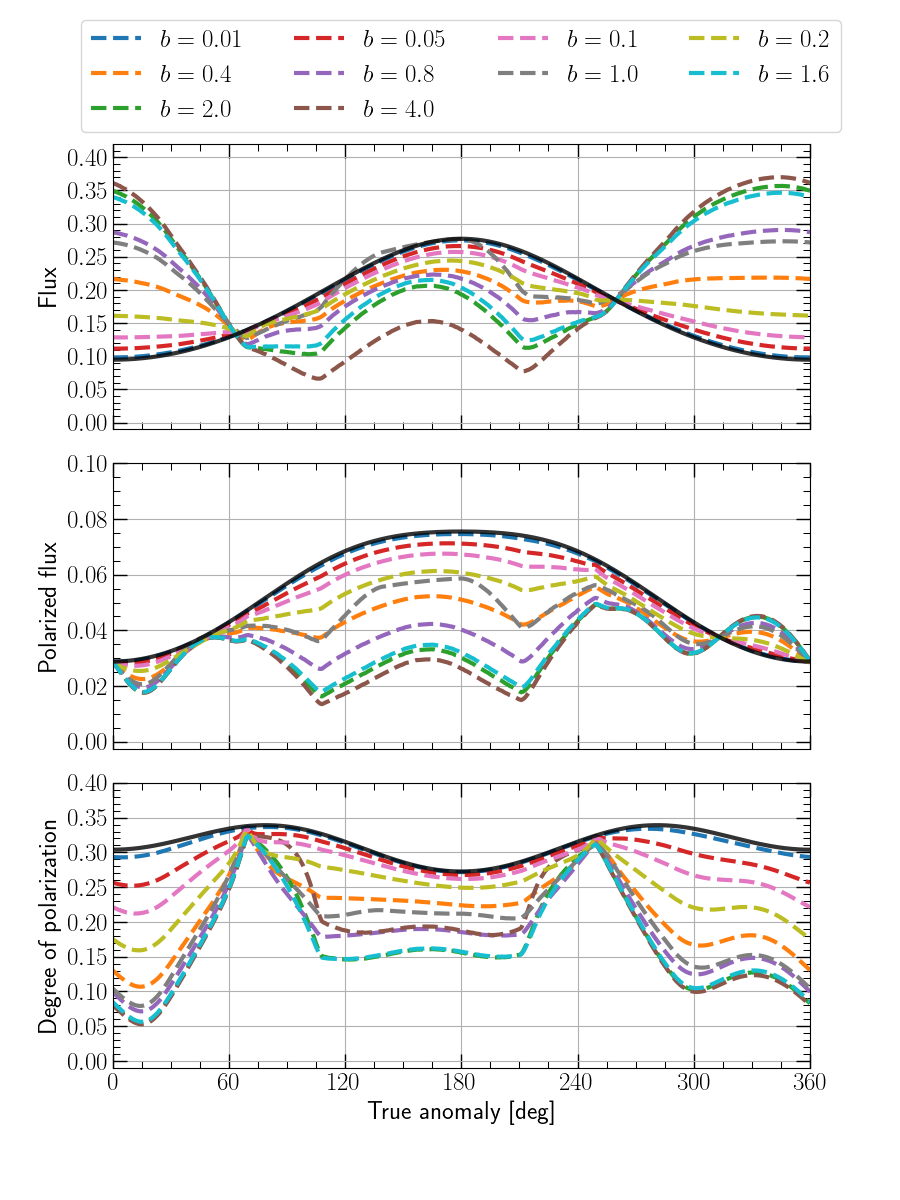

In [32]:
ring_o_thickness = np.array(["0_01","0_05","0_1","0_2","0_4","0_8","1_0","1_6","2_0","4_0"])
tau_ring = [float(string.replace("_",".")) for string in ring_o_thickness]

save_file = None
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)

# fig2 = plt.figure()
# ax2=fig2.gca()

plot_line = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]
correct_order = np.array([0,4,8,1,5,9,2,6,3,7])
for ii in correct_order:
    ring_o = ring_o_thickness[ii]
    data_loc = f"/home/allard/Data/Ring_optical_thickness_Series/Ring_optical_thickness_{ring_o}/"
    data_name = data_loc + f"data_with_Ring_optical_thickness_{ring_o}.pkl"

    with open(data_name,"rb") as f:
        save_file = pickle.load(f)

    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Stot = np.array(save_file["Stot"])
    Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
    Ptot = np.array(save_file["Ptot"])
    flux = Stot[:,0]

    axs[0].plot(true_anomaly,flux,linestyle="--",label=f"$b={tau_ring[ii]}$",linewidth=3)#linestyle=plot_line[ii],
    axs[1].plot(true_anomaly,Pflux,linestyle="--",linewidth=3)
    axs[2].plot(true_anomaly,abs(Ptot),linestyle="--",linewidth=3)
    
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.48),
              ncol=4)
axs[0].grid()
# axs[1].legend()
axs[1].grid()
# axs[2].legend()
axs[2].grid()

data_loc = f"/home/allard/Data/Orbit_incl80_fix_Series/Orbit_incl80_fix_20/"
data_name = data_loc + f"data_with_Orbit_incl80_fix_20.pkl"

with open(data_name,"rb") as f:
    save_file = pickle.load(f)
true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Sp = np.array(save_file["Sp"])
Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)
Pp = np.array(save_file["Pp"])
flux = Sp[:,0]
axs[0].plot(true_anomaly,flux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[1].plot(true_anomaly,Pflux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[2].plot(true_anomaly,abs(Pp),linestyle="-",color="k",linewidth=3,alpha=0.8)
                
efunc.setup(axs[0],60,0,360,0.05,-0.01,0.42,notext=notext)
efunc.setup(axs[1],60,0,360,0.02,-0.0025,0.1,notext=notext)
efunc.setup(axs[2],60,0,360,0.05,-0.01,0.4,notext=notext)
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Polarized flux")
axs[2].set_ylabel("Degree of polarization")
axs[2].set_xlabel("True anomaly [deg]")

fig.savefig("/home/allard/Results/Optical_thickness_sweep.svg", bbox_inches='tight', format='svg', dpi=1200)
#.eps", format='eps', bbox_inches='tight')
plt.show()

## Particle albedo sweep

<IPython.core.display.Javascript object>


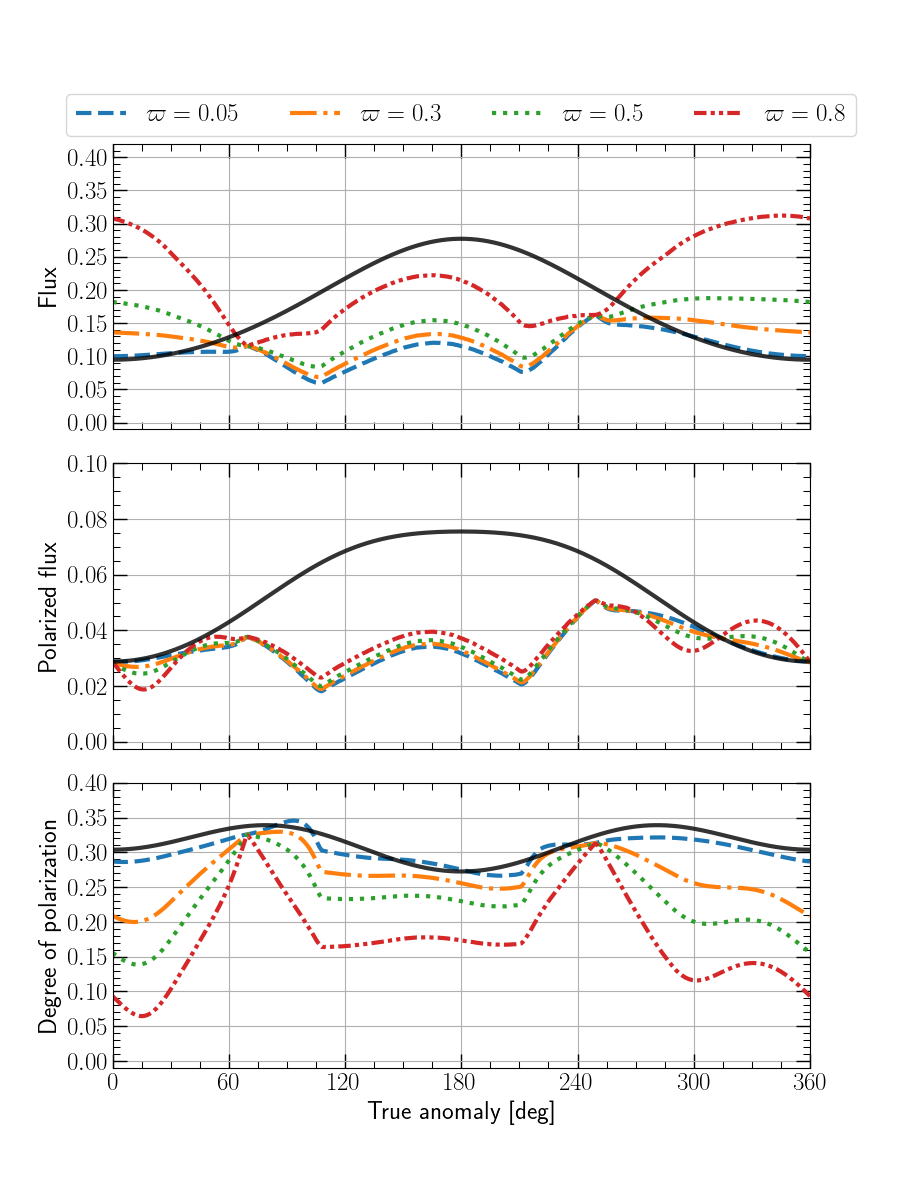

In [44]:
particle_a = np.array(["0_05","0_3","0_5","0_8"])#np.array(["0_05","0_1","0_3","0_5","0_8"])
a_p_arr = [float(string.replace("_",".")) for string in particle_a]

save_file = None
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)

# fig2 = plt.figure()
# ax2=fig2.gca()

plot_line = ["--","-.",":",(0, (3, 1, 1, 1, 1, 1))]
correct_order = np.array([0,1,2,3])
for ii in correct_order:
    a_p = particle_a[ii]
    data_loc = f"/home/allard/Data/Ring_particle_albedo_Series/Ring_particle_albedo_{a_p}/"
    data_name = data_loc + f"data_with_Ring_particle_albedo_{a_p}.pkl"

    with open(data_name,"rb") as f:
        save_file = pickle.load(f)

    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Stot = np.array(save_file["Stot"])
    Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
    Ptot = np.array(save_file["Ptot"])
    flux = Stot[:,0]

    axs[0].plot(true_anomaly,flux,linestyle=plot_line[ii],label=f"$\\varpi={a_p_arr[ii]}$",linewidth=3)
    axs[1].plot(true_anomaly,Pflux,linestyle=plot_line[ii],linewidth=3)
    axs[2].plot(true_anomaly,abs(Ptot),linestyle=plot_line[ii],linewidth=3)
    
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22),
              ncol=4)
axs[0].grid()
# axs[1].legend()
axs[1].grid()
# axs[2].legend()
axs[2].grid()

data_loc = f"/home/allard/Data/Orbit_incl80_fix_Series/Orbit_incl80_fix_20/"
data_name = data_loc + f"data_with_Orbit_incl80_fix_20.pkl"

with open(data_name,"rb") as f:
    save_file = pickle.load(f)
true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Sp = np.array(save_file["Sp"])
Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)
Pp = np.array(save_file["Pp"])
flux = Sp[:,0]
axs[0].plot(true_anomaly,flux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[1].plot(true_anomaly,Pflux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[2].plot(true_anomaly,abs(Pp),linestyle="-",color="k",linewidth=3,alpha=0.8)
                
efunc.setup(axs[0],60,0,360,0.05,-0.01,0.42,notext=notext)
efunc.setup(axs[1],60,0,360,0.02,-0.0025,0.1,notext=notext)
efunc.setup(axs[2],60,0,360,0.05,-0.01,0.4,notext=notext)
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Polarized flux")
axs[2].set_ylabel("Degree of polarization")
axs[2].set_xlabel("True anomaly [deg]")

fig.savefig("/home/allard/Results/Particle_albedo_sweep.svg", bbox_inches='tight', format='svg', dpi=1200)
#.eps", format='eps', bbox_inches='tight')
plt.show()

## Radius sweep

<IPython.core.display.Javascript object>


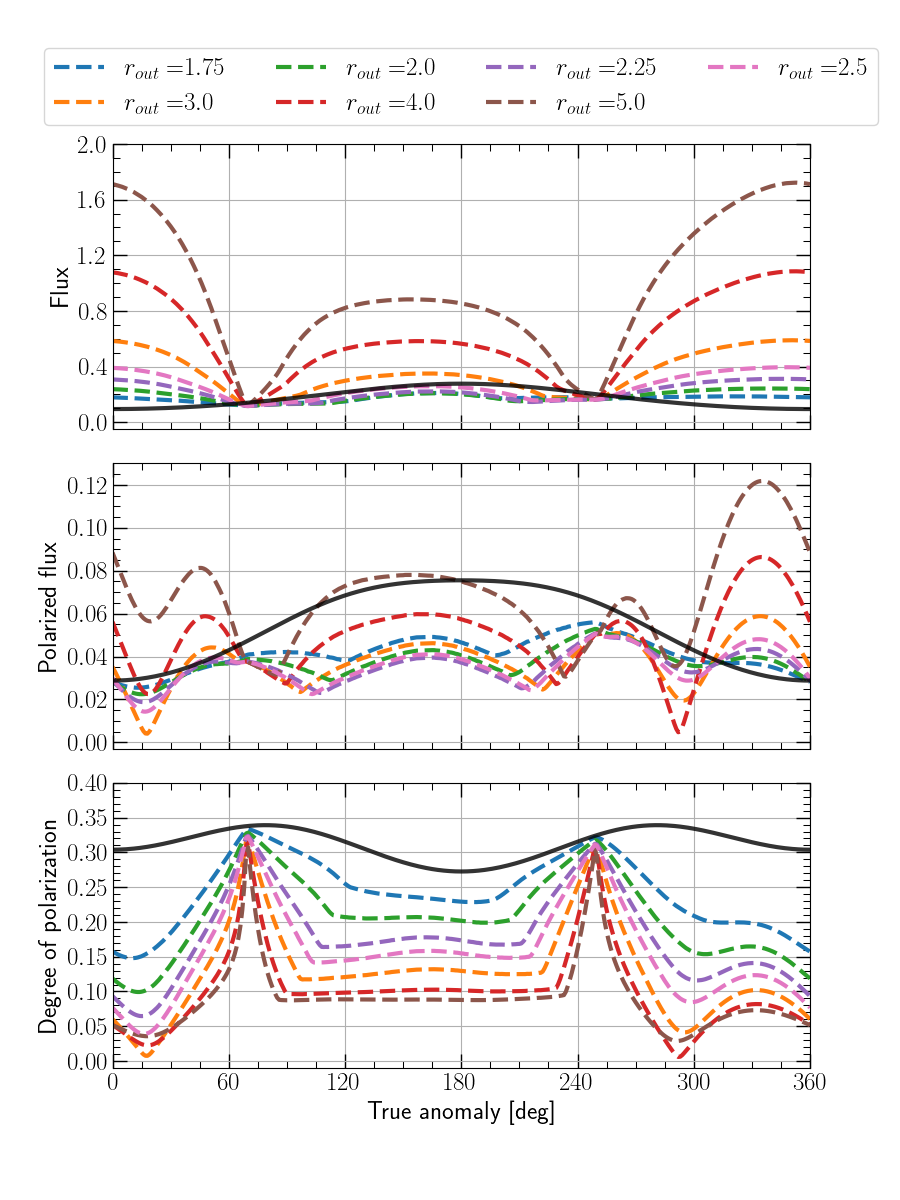

In [50]:
ring_re_arr = np.array([1.75,2.00,2.25,2.50,3.00,4.00,5.00])

notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)

# fig2 = plt.figure()
# ax2=fig2.gca()

plot_line = ["--","-.",":",(0, (3, 1, 1, 1, 1, 1))]
correct_order = np.array([0,4,1,5,2,6,3])

for ii, i_r in enumerate(correct_order):
    ring_r = ring_re_arr[i_r]
    data_loc = f"/home/allard/Data/Radius_Series/Radius_{ring_r}/"
    data_name = data_loc + f"data_with_Radius_{ring_r}.pkl"

    with open(data_name,"rb") as f:
        save_file = pickle.load(f)

    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Stot = np.array(save_file["Stot"])
    Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
    Ptot = np.array(save_file["Ptot"])
    flux = Stot[:,0]

    axs[0].plot(true_anomaly,flux,linestyle="--",label="$r_{out}=$" + f"${ring_r}$",linewidth=3)#linestyle=plot_line[ii],
    axs[1].plot(true_anomaly,Pflux,linestyle="--",linewidth=3)
    axs[2].plot(true_anomaly,abs(Ptot),linestyle="--",linewidth=3)
    
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.38),
              ncol=4)
axs[0].grid()
# axs[1].legend()
axs[1].grid()
# axs[2].legend()
axs[2].grid()

data_loc = f"/home/allard/Data/Orbit_incl80_fix_Series/Orbit_incl80_fix_20/"
data_name = data_loc + f"data_with_Orbit_incl80_fix_20.pkl"

with open(data_name,"rb") as f:
    save_file = pickle.load(f)
true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Sp = np.array(save_file["Sp"])
Pflux = np.sqrt(Sp[:,1]**2 + Sp[:,2]**2)
Pp = np.array(save_file["Pp"])
flux = Sp[:,0]
axs[0].plot(true_anomaly,flux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[1].plot(true_anomaly,Pflux,linestyle="-",color="k",linewidth=3,alpha=0.8)
axs[2].plot(true_anomaly,abs(Pp),linestyle="-",color="k",linewidth=3,alpha=0.8)
                
efunc.setup(axs[0],60,0,360,0.4,-0.05,2.0,notext=notext)
efunc.setup(axs[1],60,0,360,0.02,-0.0029,0.13,notext=notext)
efunc.setup(axs[2],60,0,360,0.05,-0.01,0.4,notext=notext)
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Polarized flux")
axs[2].set_ylabel("Degree of polarization")
axs[2].set_xlabel("True anomaly [deg]")

fig.savefig("/home/allard/Results/Ring_radius_sweep.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

## Case-study

<IPython.core.display.Javascript object>


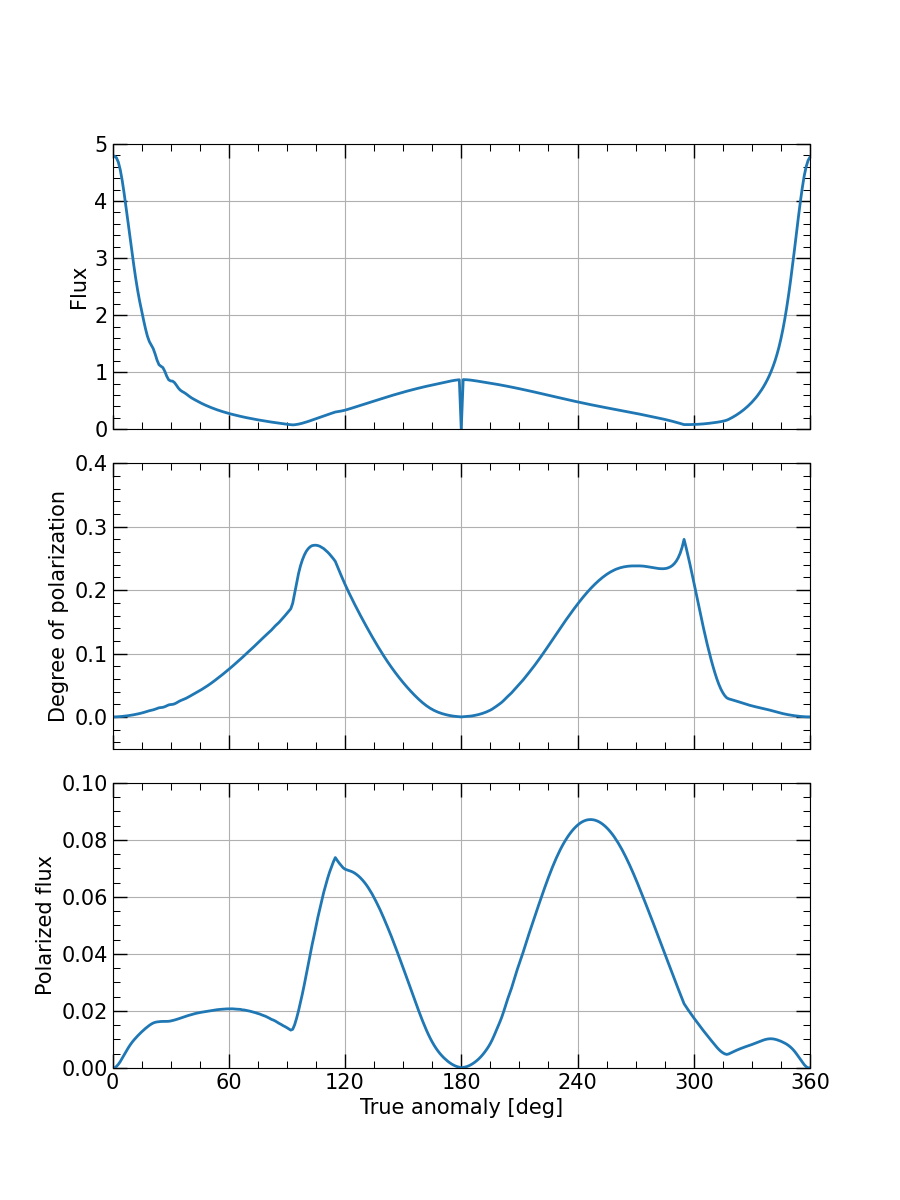

In [7]:
case_num = 0
notext = False
fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(3, hspace=0.12)
axs = gs.subplots(sharex=True)

data_loc = f"/home/allard/Data/Case_study_Series/Case_study_{case_num}/"
data_name = data_loc + f"data_with_Case_study_{case_num}.pkl"

with open(data_name,"rb") as f:
    save_file = pickle.load(f)

true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Stot = np.array(save_file["Stot"])
Pflux = np.sqrt(Stot[:,1]**2 + Stot[:,2]**2)
Ptot = np.array(save_file["Ptot"])
flux = Stot[:,0]

axs[0].plot(true_anomaly,flux,linewidth=2)
axs[1].plot(true_anomaly,abs(Ptot),linewidth=2)
axs[2].plot(true_anomaly,Pflux,linewidth=2)
# axs[0].set_yscale("log")
# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22),
#               ncol=4)
axs[0].grid()
axs[1].grid()
axs[2].grid()
                
efunc.setup(axs[0],60,0,360,0.0,5.0,notext=notext)
efunc.setup(axs[1],60,0,360,-0.05,0.4,notext=notext)
efunc.setup(axs[2],60,0,360,0.0,0.1,notext=notext)
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Degree of polarization")
axs[2].set_ylabel("Polarized flux")
axs[2].set_xlabel("True anomaly [deg]")

# fig.savefig("/home/allard/Results/Case_study_0.eps", format='eps', bbox_inches='tight')
plt.show()